# K-Means
- Common clustering technique, helps to solve many problems efficiently.
- K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

## Motivation Problem - *Pizza Parlour Study*

**Problem Statement** Given the list of locations of customers who frequently order Pizza we want to find out optimal locations of Pizza Parlours where they should be opened.

<img src="img/pizza1.png" alt="Pizza-1" width="400"/>

**Step-1** : Initialise Pizza Parlour Centers randomly.
<img src="img/pizza2.png" alt="Pizza-2" width="400"/>

**Step-2** : Assign each customer to its nearest Pizza Center.
<img src="img/pizza3.png" alt="Pizza-3" width="400"/>

**Step-3** : Update the Center Location by taking mean of customers assigned to it.
<img src="img/pizza4.png" alt="Pizza-4" width="400"/>

**Step-4** : Repeat Steps 2 and 3 Until Convergence.
<img src="img/pizza5.png" alt="Pizza-5" width="400"/>

## K-Means Algorithm

**Input Data** : X = {x1,...,xN}

**Goal** : Partition the data among some K number of clusters. Let us assume K is known to us.

Let µk denote the center of Kth Cluster (uk will be vector)

So we need to ﬁnd an assignment of data points to clusters,
as well as a set of cluster centers{µk}, such that the sum of the squares 
of the distances of each data point to its closest cluster center µk, is a minimum. 


<img src="img/k-means.png" alt="Pizza-1" style="width: 600px;"/>

## Implementation

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('seaborn')

### Dataset Preparation

In [23]:
X,Y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=7)

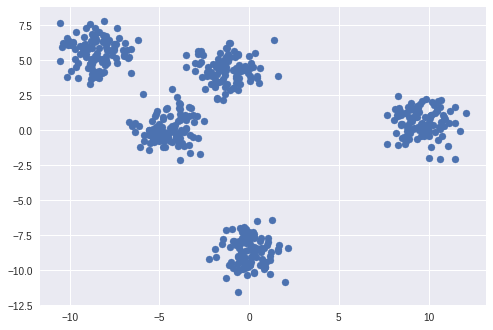

In [24]:
plt.scatter(X[:,0],X[:,1],cmap=plt.cm.Accent)
plt.show()

In [25]:
# Initializing the Mean for the clusters
k = 5
color = ['green','orange','blue','red','yellow']
clusters = {}
for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster ={
        'center':center,
        'points':points,
        'color':color[i]
    }
    clusters[i] = cluster

### Algorithm Implementation

In [26]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

def assignPointToCluster(clusters): # E-step
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]
        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
        
def updateClusters(clusters): # M-step
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        if pts.shape[0]>0:
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = []

def plotClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        try: # Plot the points
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        u = clusters[kx]['center'] # Plot the cluster center
        plt.scatter(u[0],u[1],color='black',marker='*')

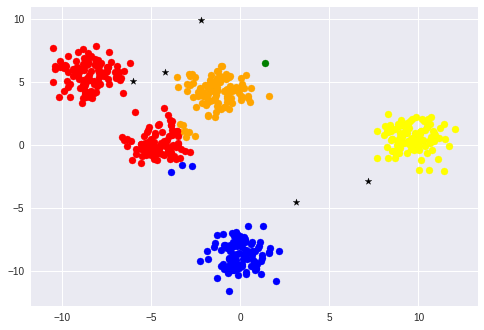

In [27]:
assignPointToCluster(clusters)
plotClusters(clusters)

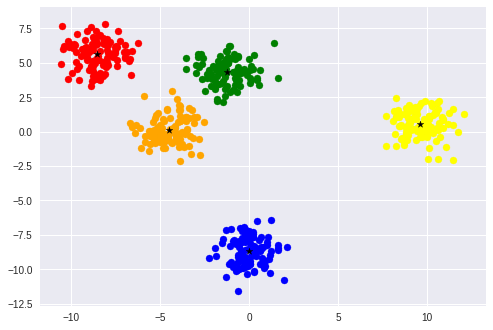

In [36]:
# Repeat until the clusters convergence
assignPointToCluster(clusters)
plotClusters(clusters)
updateClusters(clusters)